In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

#Get the file name from the uploaded dictionary
filename = list(uploaded.keys())[0]

df = pd.read_csv(io.BytesIO(uploaded[filename]))
print(df)


Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction.csv
     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Get Summary Statistics for the entire DataFrame
Summary_stats = df.describe()
print(Summary_stats)



              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min 

**Central Tendency of Key Features**
The mean age of patients is 54.43 years which is close to the median of 55 years. This suggests the distribution of age is fairly symmetric, with most patients being middle-aged to elderly. The mean cholesterol level is 249.66 mg/dL,while the median is 245 mg/dL. The difference suggests a slight right skew,indicating some patients have very high cholesterol levels. The mean Blood pressure is 131.34 mmHg, which aligns closely with the median of 130.00 mmHg, indicating a fairly symmetric distribution of blood pressure values.

**Spread/Variability of Key Features**
The standsard deviation of cholesterol is 51.69 mg/dL indicating significant variablity among patients. The interquartile range is 67 mg/dL, showing a considerable spread in cholesterol levels, which may point to different risk profiles in the patient population.
The Interquartile range for age is 13 years, with most patients falling between 61 and 48 years. This suggests that heart disease is more prevalent in older adults, though outliers in both younger and older age groups are present.

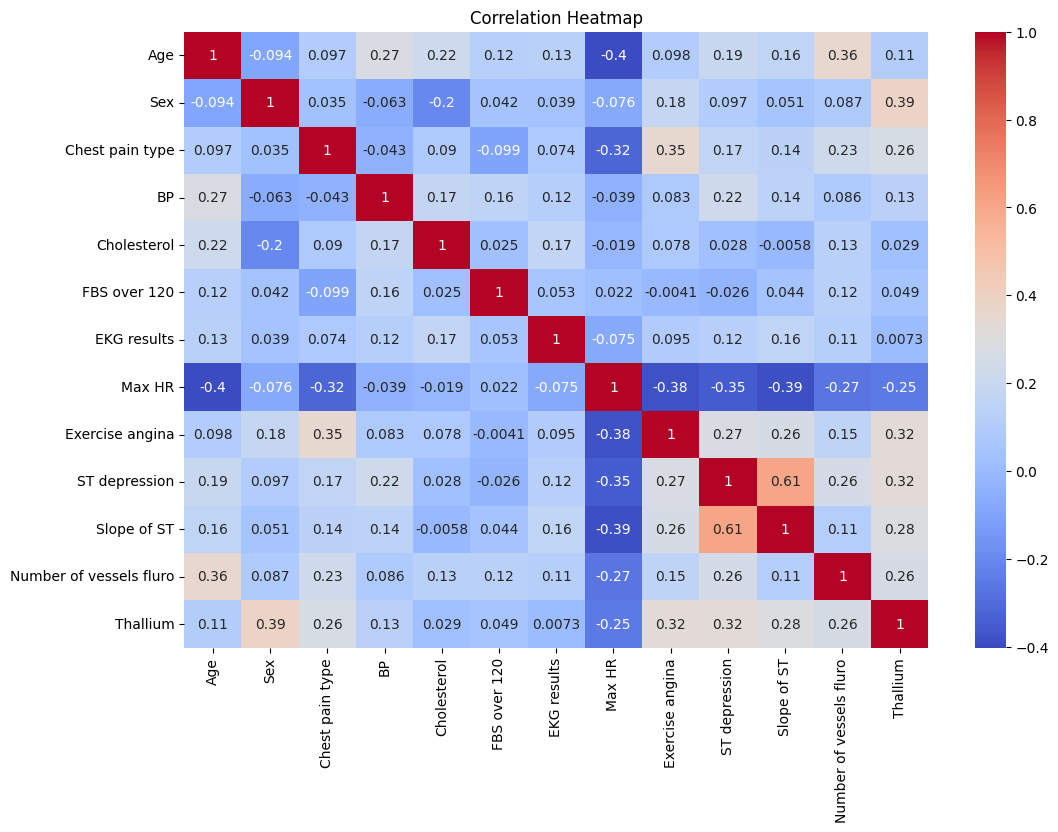

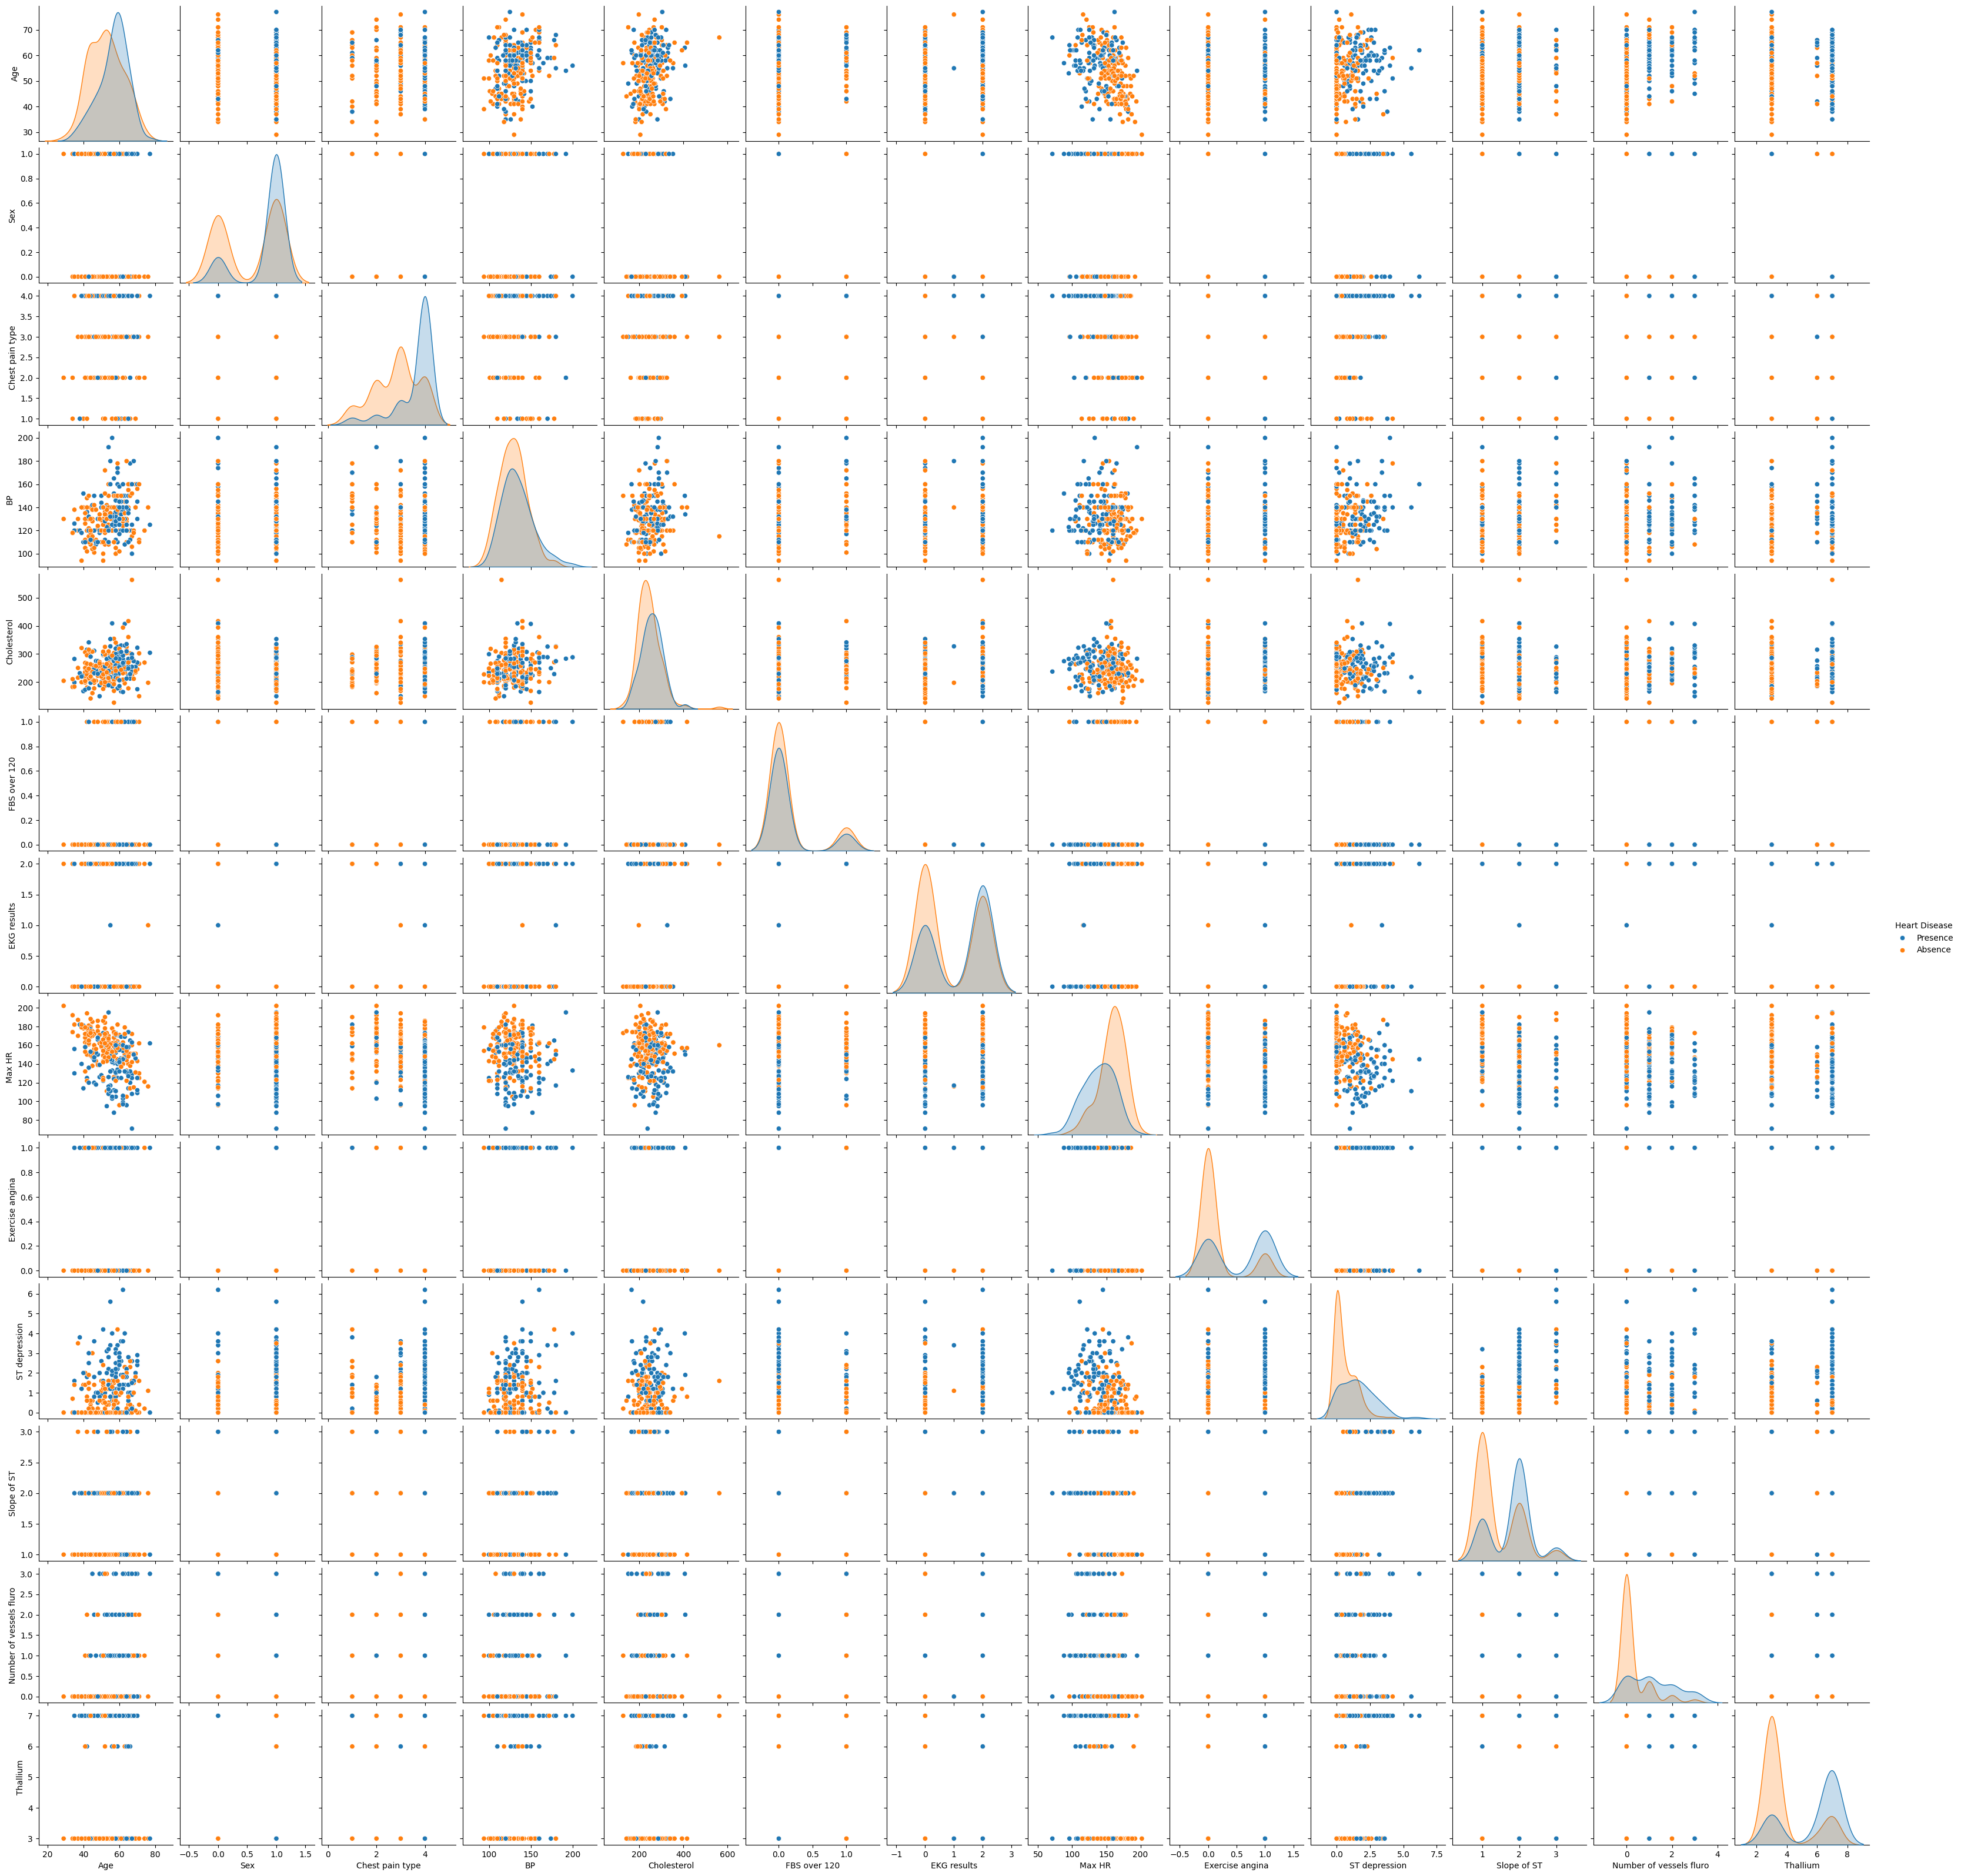

In [ ]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float', 'int'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot to explore relationships
sns.pairplot(df, hue='Heart Disease')
plt.show()

**Correlation heatmap**
The heatmap reveals that features such as Cholesterol and Max Heart Rate exhibit a moderate negative correlation with the target variable, Heart Disease, meaning that as cholesterol levels or max HR increase, the likelihood of heart disease decreases.

A strong positive correlation of 0.22 is observed between age and cholesterol, suggesting that older individuals in this dataset tend to have higher cholesterol levels. This multicollinearity could impact model performance, as hightly correlated features may introduce redundancy.

**Pair Plots**
The pair plots gives a visual representation of relationships between pairs of features and the target variable.
The Scatter plots show clear trends between certain features. For instance, there is a visible negative relationship between Max HR and age, which is expected given that older individuals tend to have lower max HR. This relationship is especially pronounced among patients with heart disease.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop('Heart Disease', axis=1) # Drop the target column
y = df['Heart Disease']

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RandomForestClassifier as the model
model = RandomForestClassifier()

# Use RFE to select the top 10 features
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X_train, y_train)

# Select features

selected_features = X.columns[fit.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Age', 'Chest pain type', 'BP', 'Cholesterol', 'Max HR',
       'Exercise angina', 'ST depression', 'Slope of ST',
       'Number of vessels fluro', 'Thallium'],
      dtype='object')


The selected features represent a comprehensive set of clinical and diagnostic factors that are crucial in assessing the risk of heart disease. By including age, chest pain type, blood pressure, cholesterol levels, and results from diagnostic tests like the thallium stress test, the model captures a wide range of both demographic and clinical variables that directly influence heart disease outcomes. This selection ensures that the model takes into account the most relevant predictors, leading to more accurate and reliable predictions.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.4 MB/s eta 0:00:00


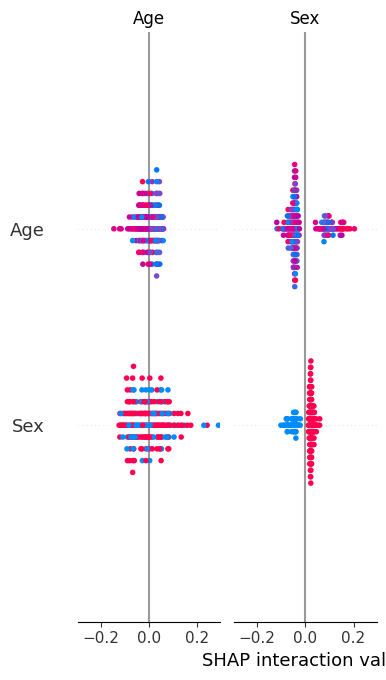

In [ ]:
!pip install shap
import shap

# Train the random forest model
model.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

#plot SHAP summary plot
shap.summary_plot(shap_values, X_train) # 1 represents class 1 in a binary classifier

**SHAP Interactions between Age and Sex**
The SHAP interaction analysis between Age and Sex in the heart disease prediction model shows that age has a more significant impact on heart disease risk for males at younger ages, while females experience a more gradual increase risk, particularly after menopause. These findings align with clinical knowledge and suggests that early intervention for younger males and increased monitoring of older females could help in preventing heart disease. Incorporating this interaction in the model through feature engineering could improve prediction accuracy and provide actionable insights for personalized healthcare strategies.

In [ ]:
# Check for missing values

print("Missing Values:\n", df.isnull().sum())

# Select only numerical columns for imputation
numerical_df = df.select_dtypes(include=['float', 'int'])

# Fill missing values in numerical columns with their means
numerical_df = numerical_df.fillna(numerical_df.mean())

# Replace the original numerical columns with the imputed values
df[numerical_df.columns] = numerical_df

# Join the imputed numerical columns back with the original DataFrame
df = df.drop(numerical_df.columns, axis=1).join(numerical_df)


# Check for illogical values
illogical_values = df[(df['Age'] < 0)]
print("Illogical Values:\n", illogical_values)

Missing Values:
 Heart Disease              0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
dtype: int64
Illogical Values:
 Empty DataFrame
Columns: [Heart Disease, Age, Sex, Chest pain type, BP, Cholesterol, FBS over 120, EKG results, Max HR, Exercise angina, ST depression, Slope of ST, Number of vessels fluro, Thallium]
Index: []


**Missing values**

There are no missing values in the all the variables in my dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


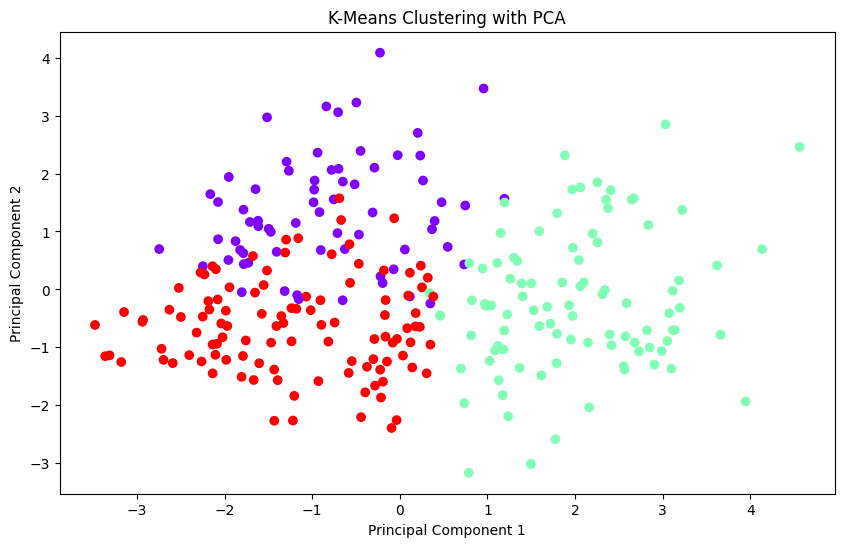

In [ ]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Heart Disease', axis=1))

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='rainbow')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**K-Means Clustering with PCA**
The use of PCA in combination with K-means clustering allowed me to uncover distinct patient subgroups based on the principal components of the dataset. These clusters provide insights into different heart disease risk profiles, such as younger, healthier patients and older patients with more severe risk factors. The insights gained from these clusters could be valuable for developing more personalized treatment strategies and improving the performance of the predictive model by incorporating cluster assignments as features.

In [ ]:
# Feature Selection using SelectKBest
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(X, y)

# Display scores of features
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Concatenate the scores and column names
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Features', 'Score']
print(feature_scores.nlargest(10, 'Score'))

                   Features       Score
12                 Thallium  101.985020
11  Number of vessels fluro   70.098369
8           Exercise angina   57.169619
7                    Max HR   56.909111
9             ST depression   56.729134
2           Chest pain type   56.554610
10              Slope of ST   34.477790
1                       Sex   26.065252
0                       Age   12.651991
6               EKG results    9.190828


**Feature Importance Interpretation**

Overall, the feature importance scores highlights the significance of diagnostic tests like the thallium test and fluoroscopy and exercise-induced symptom like exercise angina and max heart rate in predicting heart disease. These features directly reflect the functioning of the cardiovascular system, making them vital in distinguishing between patients with and without heart disease. Meanwhile, demographic factors like sex and age, while still important, have relatively less impact on the model's predictions compared to clinical and diagnostic features. Thallium has a feature importance score of 101.68 which represents the most significant predictor of heart disease in the model. The second most important feature is Number of vessels Fluro with a score of 70.10. This feature reflects the number of major coronary arteries with significant blockage, as detected by fluoroscopy.
The feature EKG reslults, with a score of 9.19 has relatively lower importance compared to the other features. While still relevant, this feature may capture less variance in heart disease risk compared to more specific diagnostic tests like Thallium scan or exercise-induced angina.

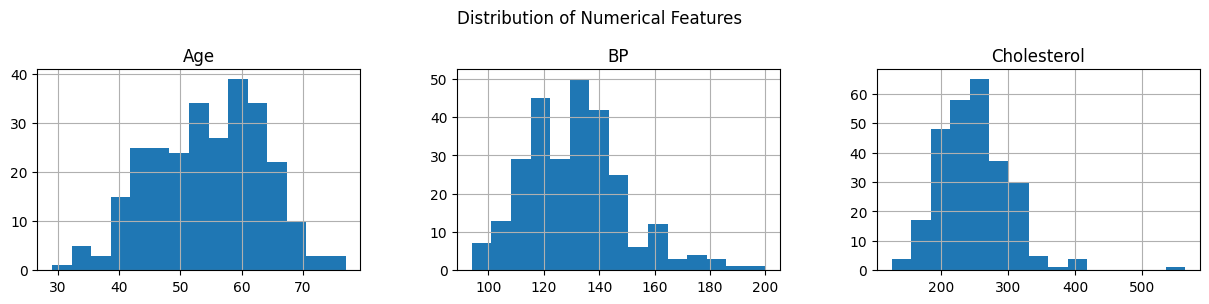

<Figure size 1200x600 with 0 Axes>

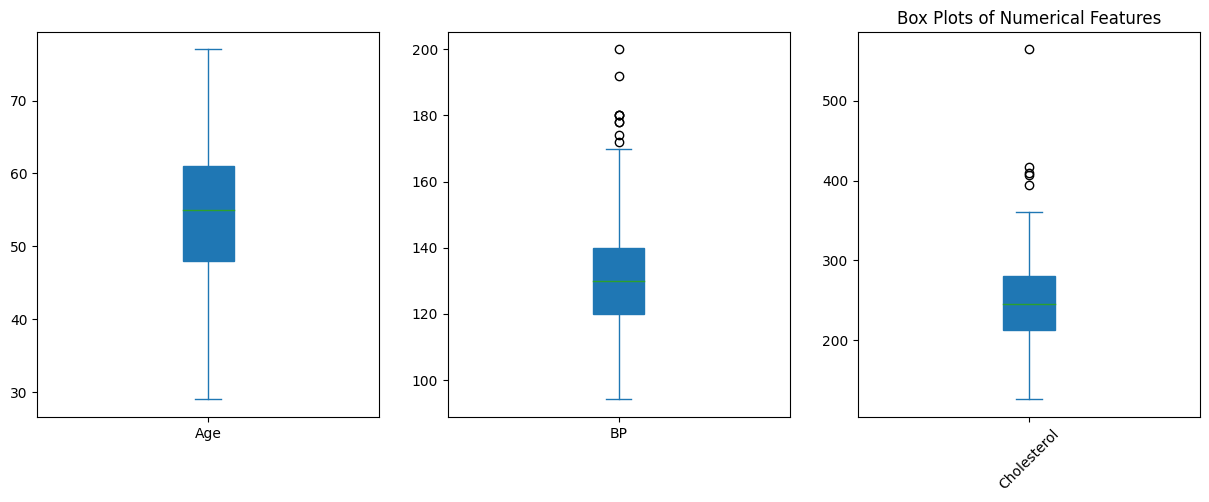

In [ ]:
# List of numerical features to plot

num_features = ['Age', 'BP', 'Cholesterol']

# plot histograms for each numerical feature
df[num_features].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Plot box plots for each numerical feature
plt.figure(figsize=(12, 6))
df[num_features].plot(kind='box', subplots=True, layout=(1, len(num_features)), figsize=(15,5), patch_artist=True )
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

**Age Distribution**
The distribution of Age appears fairly symmetric, with a slight concentration of values around the 50-60 age range. There is a minor left skew (negative skew), as noted in the skewness calculation (-0.16), meaning there are a few slightly younger patients, but the overall distribution is well-balanced.

**Blood Pressure Distribution**
Blood Pressure (BP) shows a right skew (positive skew), with most values clustered between 120 and 150 mmHg. There are fewer patients with very high blood pressure values (above 160 mmHg), confirming the skewness of 0.72 reported earlier. This indicates that while high blood pressure is common, extremely high BP is relatively rare in this dataset.

**Cholesterol Distribution**
The Cholesterol feature is notably right-skewed, with the majority of patients having cholesterol levels between 200 and 300 mg/dL. However, there are a few patients with very high cholesterol levels, exceeding 400 mg/dL, which is consistent with the skewness of 1.18 before transformation. This suggests the presence of outliers that can impact model performance if not properly handled.


**BOX PLOTS**
**Age**
The box plot for Age shows that the distribution is fairly symmetric. The median age is around 55, and the interquartile range (IQR) lies between 45 and 65, indicating that the middle 50% of patients are within this age range.
There are no visible outliers in the age distribution, which means the ages are well distributed without extreme values.

**Blood Pressure**
The box plot for Blood Pressure (BP) shows a median value slightly above 130 mmHg. The IQR ranges from approximately 120 to 145 mmHg, indicating that the central 50% of blood pressure values fall within this range.
There are several outliers above 160 mmHg, which is consistent with the earlier observation of a right-skewed distribution. These high BP outliers could represent patients with severe hypertension, and their presence may affect the model if not accounted for.

**Cholesterol**
The Cholesterol box plot shows a median value of around 250 mg/dL, with the IQR spanning from approximately 210 to 290 mg/dL. This suggests that the middle 50% of patients have cholesterol levels within this range.
There are several significant outliers above 400 mg/dL, with one extreme outlier exceeding 500 mg/dL. These high cholesterol values could skew the model's performance, particularly if not addressed during preprocessing (such as through transformations or outlier handling).


In [ ]:
# Check skewness of numerical variables

skewness = df[num_features].skew()
print("Skewness:\n", skewness)

import numpy as np

# Apply log transformation to highly skewed data
df['log_cholestrol'] = np.log1p(df['Cholesterol'] + 1) # Add 1 to avoid log(0)
df['log_BP'] = np.log1p(df['BP'] + 1)

# Check skewness after transformation
skewness_after = df[['log_cholestrol', 'log_BP']].skew()
print("Skewness after transformation:\n", skewness_after)

# Using IQR to identify outliers in 'cholesterol'
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1

# Filter out the outliers
df_no_outliers = df[(df['Cholesterol'] >= lower_bound) & (df['Cholesterol'] <= upper_bound)]

print("Data without outliers shape:", df_no_outliers.shape)



Skewness:
 Age           -0.163615
BP             0.722618
Cholesterol    1.183721
dtype: float64
Skewness after transformation:
 log_cholestrol    0.097160
log_BP            0.295188
dtype: float64
Data without outliers shape: (203, 16)


In this analysis, we examined the skewness of key features and applied transformations to improve data distribution for the heart disease prediction model. Initially, Age showed near symmetry with minimal skewness (-0.16), while Blood Pressure (BP) and Cholesterol exhibited moderate (0.72) and significant (1.18) positive skew, respectively. To address the skewness in BP and Cholesterol, a log transformation was applied, reducing their skewness to more acceptable levels—0.29 for log_BP and 0.097 for log_cholesterol—bringing them closer to a normal distribution. Additionally, outliers were removed, reducing the dataset to 203 observations with 16 features. These preprocessing steps, including transformations and outlier removal, are essential for improving the model's ability to generalize and reduce bias from extreme values, leading to more accurate and reliable predictions of heart disease risk.

To address the potential data ethics and security concerns in this heart disease prediction project, it is essential to ensure the dataset is fully anonymized, removing all personally identifiable information (PII) and protected health information (PHI) while following guidelines like HIPAA. Obtaining informed consent for the use of data in research is crucial, along with ensuring compliance with data use agreements. Data security measures such as encryption, access control, and secure storage should be implemented to prevent unauthorized access. To mitigate biases, the dataset should be thoroughly analyzed for imbalances, and fairness-aware algorithms should be applied to ensure unbiased predictions. Ensuring the data's accuracy and integrity through validation, version control, and cleaning processes is also critical to prevent flawed results. Transparency in the model's development and decision-making process should be maintained by documenting procedures and using interpretable models. Finally, sharing data should be done in compliance with legal regulations, ensuring minimal data exposure and protecting patient privacy. These measures will help ensure the responsible and secure handling of healthcare data, minimizing ethical risks and maximizing the reliability of the model.